### Oversampling with SMOTE and Logistic Regression

In [1]:
# Importing the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, classification_report, roc_curve

from imbalanced import over_sampling, under_sampling
from helper import save_model, load_model
from ML_helper import cross_validation, train_and_evaluate

In [2]:
# Configuration
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('display.max_columns', 500)

# Filter Warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset
df = pd.read_csv("Modified Data/ML_ready.csv")
df.head()

,Gender,Age Range,Heart Attack,Angina or Coronary Heart Disease,Stroke,High Blood Pressure,Cholesterol Is High,Taking medicine for high cholesterol,Diabetes,Kidney Disease,Arthritis,General Health,Number of Days Physical Health Not Good,Number of Days Mental Health Not Good,Exercise in Past 30 Days,Physical activities frequence,Smoked at Least 100 Cigarettes,Smokeless Tobacco Products,E-cigarettes Frequency,Days in past 30 had alcoholic beverage,BMI_Category
0,0,12,0,0,0,1,0,0,1,0,0,3,30,30,0,0,0,0,0,0,3
1,0,12,0,0,0,1,1,1,0,0,1,3,30,30,1,0,0,0,0,0,2
2,0,12,0,0,0,1,1,1,0,0,1,1,6,2,1,5,1,0,0,0,1
3,0,11,0,0,0,0,0,0,0,0,1,3,2,30,1,0,0,0,0,0,2
4,0,11,0,0,0,1,0,0,1,0,1,1,30,30,1,0,0,1,0,2,2


In [4]:
target = "Heart Attack"
df_resampled = under_sampling(df, target)

Original class distribution: Counter({0: 409872, 1: 23451})
Resampled class distribution: Counter({0: 23451, 1: 23451})


In [5]:
X = df_resampled.drop(columns=[target])
y = df_resampled[target]

In [6]:
metrices = {
    "Confusion_metrix": confusion_matrix,
    "F1_score": f1_score,
    "AUC-ROC_Score": roc_auc_score,
    "Classification_report": classification_report
    }

### Cross-Validation with k-fold

In [7]:
results = cross_validation(X, y, LogisticRegression(), metrices)

In [8]:
# Print metrics
print("Cross-Validation Performance Metrics:\n")
for i in range(5):
    print(f"📌 Fold {i+1}:")
    print(f"   AUC-ROC Score: {results['AUC-ROC_Score'][i]:.4f}")
    print(f"   F1 Score: {results['F1_score'][i]:.4f}")
    print(f"   Classification Report: \n{results['Classification_report'][i]}")
    print("___________________________________\n\n")

# Compute and print averages
avg_auc = np.mean(results['AUC-ROC_Score'])
avg_f1 = np.mean(results['F1_score'])

print(f"🔹 **Average AUC-ROC Score:** {avg_auc:.4f}")
print(f"🔹 **Average F1 Score:** {avg_f1:.4f}")

Cross-Validation Performance Metrics:

📌 Fold 1:
   AUC-ROC Score: 0.8557
   F1 Score: 0.8509
   Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4691
           1       0.88      0.82      0.85      4690

    accuracy                           0.86      9381
   macro avg       0.86      0.86      0.86      9381
weighted avg       0.86      0.86      0.86      9381

___________________________________


📌 Fold 2:
   AUC-ROC Score: 0.8592
   F1 Score: 0.8543
   Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      4690
           1       0.89      0.83      0.85      4691

    accuracy                           0.86      9381
   macro avg       0.86      0.86      0.86      9381
weighted avg       0.86      0.86      0.86      9381

___________________________________


📌 Fold 3:
   AUC-ROC Score: 0.8588
   F1 Score: 0.8535
   Classific

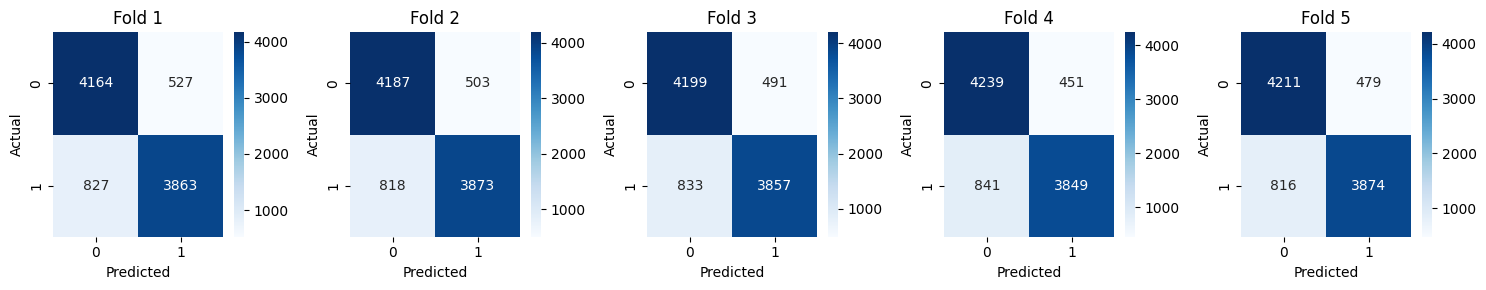

In [9]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i, cm in enumerate(results['Confusion_metrix']):
    ax = axes[i]
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"Fold {i+1}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show();

### Train and test Model

In [10]:
# Split dataset into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [11]:
model = LogisticRegression()

🔹 AUC-ROC Score: 0.9254
🔹 F1 Score: 0.8535
📌 Confusion Matrix:
[[4158  533]
 [ 802 3888]]

📌 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      4691
           1       0.88      0.83      0.85      4690

    accuracy                           0.86      9381
   macro avg       0.86      0.86      0.86      9381
weighted avg       0.86      0.86      0.86      9381




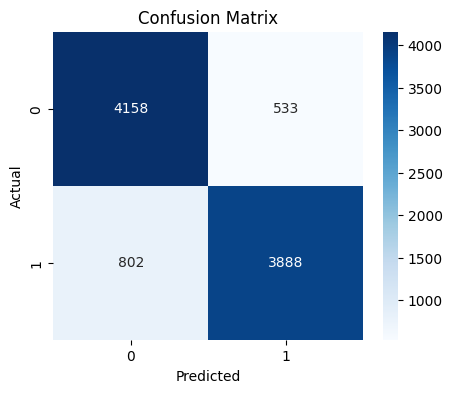

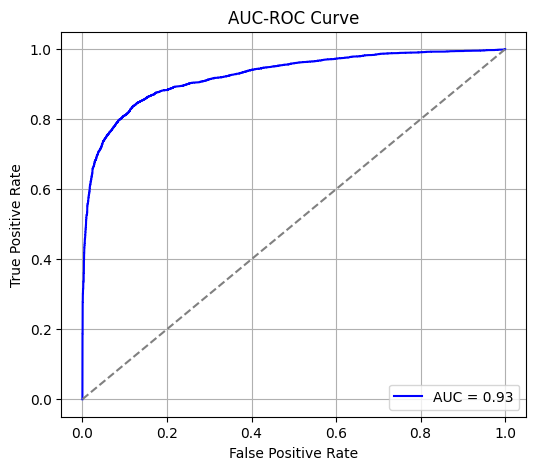

LogisticRegression()

In [12]:
train_and_evaluate(model, X_train, X_test, y_train, y_test)

### Finding best params

In [13]:
# Define model
logistic = LogisticRegression(solver="liblinear", max_iter=1000)

# Define hyperparameter
param_grid = {'C':  [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Use GridSearchCV for tuning regularization
grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='roc_auc', verbose=1)
grid_search.fit(X, y)

# Best hyperparameters
print(f"🔹 Best Parameters: {grid_search.best_params_}")
print(f"🔹 Best AUC-ROC Score: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

🔹 Best Parameters: {'C': 0.1, 'penalty': 'l1'}
🔹 Best AUC-ROC Score: 0.9303


In [14]:
# Train model with best C and penalty
best_model = LogisticRegression(penalty=grid_search.best_params_['penalty'], 
                                C=grid_search.best_params_['C'], 
                                solver='liblinear', max_iter=1000)

🔹 AUC-ROC Score: 0.9285
🔹 F1 Score: 0.8590
📌 Confusion Matrix:
[[4199  492]
 [ 789 3901]]

📌 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      4691
           1       0.89      0.83      0.86      4690

    accuracy                           0.86      9381
   macro avg       0.86      0.86      0.86      9381
weighted avg       0.86      0.86      0.86      9381




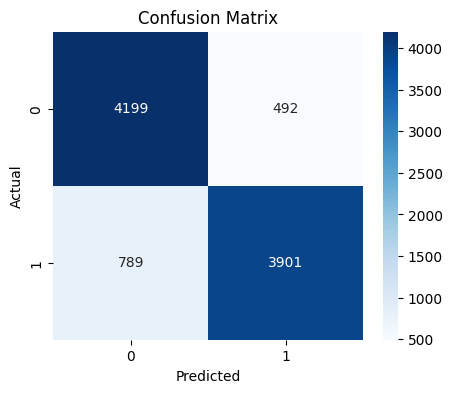

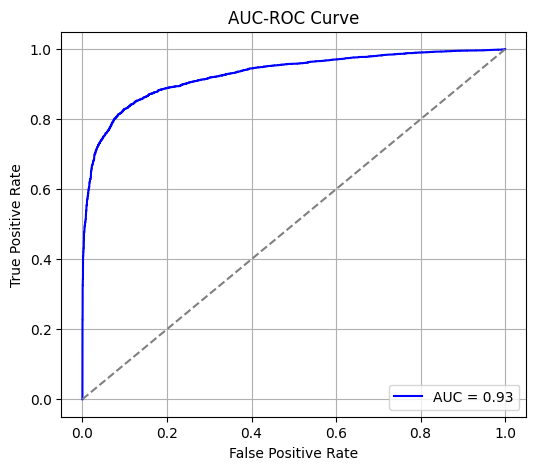

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear')

In [15]:
train_and_evaluate(best_model, X_train, X_test, y_train, y_test)

In [16]:
# Print final coefficients
print(f"🔹 Final Model Coefficients: {best_model.coef_}")

🔹 Final Model Coefficients: [[ 0.25183793 -0.07028376  2.29122641  2.10149768 -0.16507182 -0.27551396
   0.30895587  0.60874583  1.29376597  0.17692311 -0.27446662 -0.1672502
  -0.20328856 -0.30172995  0.07984431  0.4915845   2.01174384  1.50199365
   0.28303629  0.14983921]]


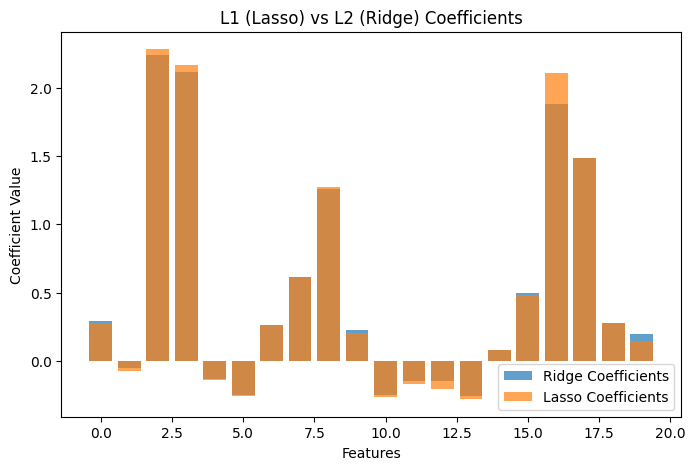

In [17]:
# Train models separately for L1 and L2 for comparison
lasso = LogisticRegression(penalty='l1', C=grid_search.best_params_['C'], solver='liblinear', max_iter=1000)
ridge = LogisticRegression(penalty='l2', C=grid_search.best_params_['C'], solver='liblinear', max_iter=1000)

lasso.fit(X, y)
ridge.fit(X, y)

plt.figure(figsize=(8, 5))
plt.bar(range(X.shape[1]), ridge.coef_.flatten(), label="Ridge Coefficients", alpha=0.7)
plt.bar(range(X.shape[1]), lasso.coef_.flatten(), label="Lasso Coefficients", alpha=0.7)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("L1 (Lasso) vs L2 (Ridge) Coefficients")
plt.legend()
plt.show();

In [18]:
save_model(best_model, "Logistic_Regression.pkl")

Model saved successfully as Model/Logistic_Regression.pkl
